<img src=https://learnopencv.com/wp-content/uploads/2024/08/CLIP-Zero-Short-Inference-Pipeline-1024x623.png height=400>

In [2]:
# !pip install transformers -U -q

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cohere 5.5.8 requires boto3<2.0.0,>=1.34.0, which is not installed.

[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


# Zero Shot CLassification with Pretrained CLIP

In [1]:
from PIL import Image
import requests

import torch
from transformers import CLIPProcessor, CLIPModel
import matplotlib.pyplot as plt

In [2]:
pretrained_clip = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

/home/jaykumaran/miniconda3/envs/torch_2x/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [5]:
total_params = sum(param.numel() for param in pretrained_clip.parameters())

print(f"Total number of parameters in the model: {total_params}")

Total number of parameters in the model: 151277313


### Plotting Utility

In [10]:
def visualize_predictions(image,pred_cls):
    plt.figure(figsize=(6,6))
    plt.title(f"Predicted Class: {pred_cls}", fontsize=16)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

def prediction(url, labels):
    
    image = Image.open(requests.get(url,stream=True).raw)
    inputs = processor(labels, images=image, return_tensors ="pt", padding = True)
    outputs = pretrained_clip(**inputs)
    logits_per_image = outputs.logits_per_image
    
    probs = logits_per_image.softmax(dim=1)
    cls_ids = torch.argmax(probs, dim=1)
    pred_cls = labels[cls_ids.item()]
    
    visualize_predictions(image, pred_cls)
    return

## Facial Emotion Recognition

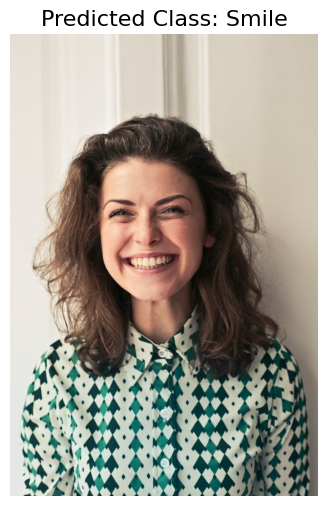

In [4]:
url = "https://images.pexels.com/photos/774909/pexels-photo-774909.jpeg?auto=compress&cs=tinysrgb&w=600"
labels = ["Smile","Sad", "Cry", "Surprise", "Anger"]
prediction(url, labels)

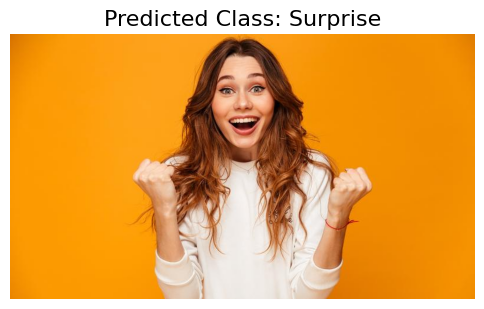

In [30]:
url = "https://d26oc3sg82pgk3.cloudfront.net/files/media/edit/image/47054/article_full%401x.jpg"
prediction(url, labels)

## Natural Images

In [6]:
!wget https://cdn.unenvironment.org/2021-07/Tiger_shutterstock.jpeg -O tiger.jpg

--2024-08-13 22:19:03--  https://cdn.unenvironment.org/2021-07/Tiger_shutterstock.jpeg
Resolving cdn.unenvironment.org (cdn.unenvironment.org)... 104.21.64.78, 172.67.178.121, 2606:4700:3032::6815:404e, ...
Connecting to cdn.unenvironment.org (cdn.unenvironment.org)|104.21.64.78|:443... connected.
HTTP request sent, awaiting response... 

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


200 OK
Length: 812555 (794K) [image/jpeg]
Saving to: ‘tiger.jpg’

tiger.jpg           100%[===================>] 793.51K  2.42MB/s    in 0.3s    

2024-08-13 22:19:04 (2.42 MB/s) - ‘tiger.jpg’ saved [812555/812555]



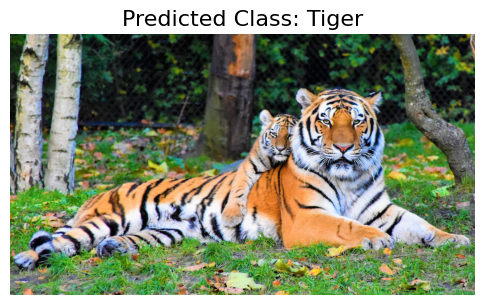

In [9]:
img_path = "tiger.jpg"

def visualize_predictions(image,pred_cls):
    plt.figure(figsize=(6,6))
    plt.title(f"Predicted Class: {pred_cls}", fontsize=16)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

def prediction_img(img_path, labels):
    
    image = Image.open(img_path)
    inputs = processor(labels, images=image, return_tensors ="pt", padding = True)
    outputs = pretrained_clip(**inputs)
    logits_per_image = outputs.logits_per_image
    
    probs = logits_per_image.softmax(dim=1)
    cls_ids = torch.argmax(probs, dim=1)
    pred_cls = labels[cls_ids.item()]
    
    visualize_predictions(image, pred_cls)
    return
labels = ["Lion", "Panther", "Cheetah", "Tiger", "Leopard", "Jaguar"]
prediction_img(img_path, labels)

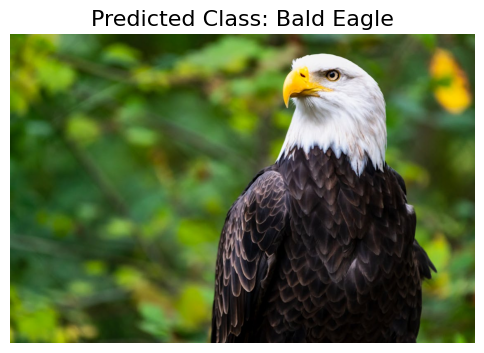

In [11]:
url = "https://images.pexels.com/photos/9877289/pexels-photo-9877289.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1"
labels = ["Bald Eagle", "Golden Eagle", "Vulture", "Hawk"]
prediction(url, labels)

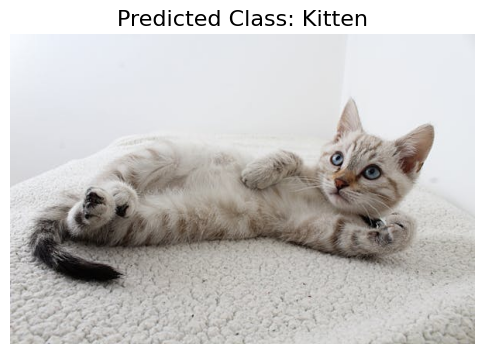

In [80]:
url = "https://images.pexels.com/photos/2558605/pexels-photo-2558605.jpeg?auto=compress&cs=tinysrgb&w=600"
labels = ["Kitten","Cat", "Baby Cat", "White Cat", "Fur"]
prediction(url, labels)

## Human Activities

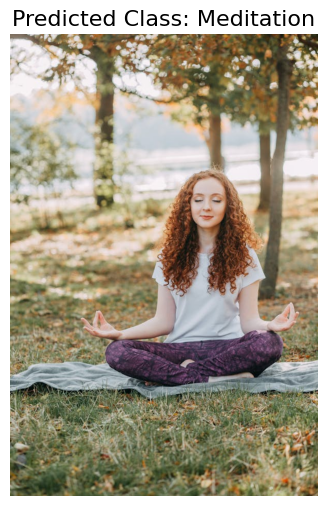

In [81]:
url = "https://images.pexels.com/photos/3759657/pexels-photo-3759657.jpeg?auto=compress&cs=tinysrgb&w=600"
labels = ["Meditation", "Yoga", "Eyes closed", "Karate", "Indian Martial Arts","Martial Arts"]
prediction(url, labels)

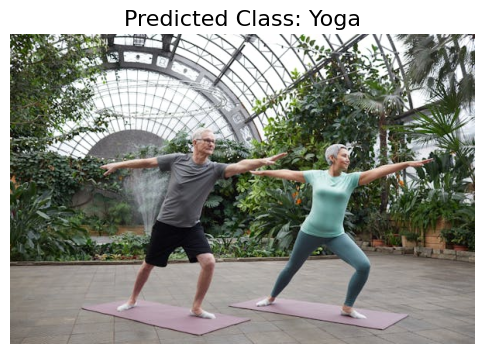

In [82]:
url = "https://images.pexels.com/photos/6787440/pexels-photo-6787440.jpeg?auto=compress&cs=tinysrgb&w=600"
prediction(url, labels)

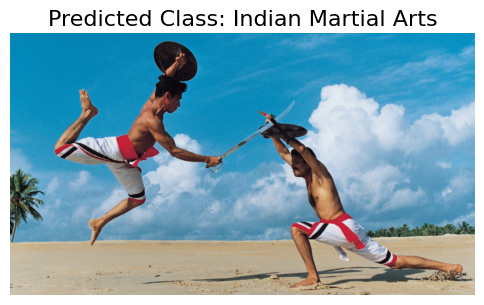

In [83]:
url = "https://www.keralatourism.org/images/artforms/large/kalaripayattu20131111114353_27_1.jpg"
prediction(url, labels)

## Inference on Digit Recognition

In [17]:
labels = ["One", "Two", "Three", "Four", "Five", "Six", "Seven", "Eight", "Nine"]

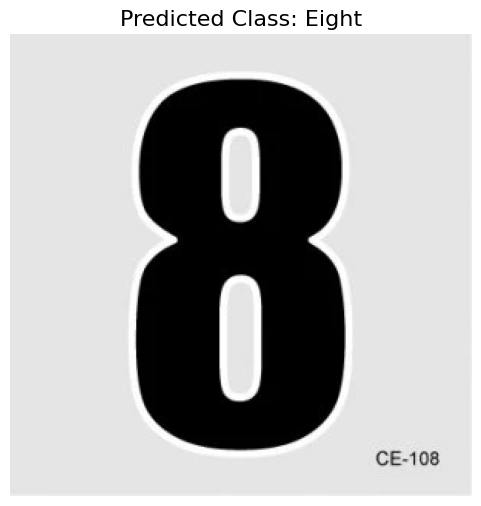

In [55]:
url = "https://www.tattstore.com/upload/product_images/2737_1.webp"
prediction(url, labels)

### Failure Cases

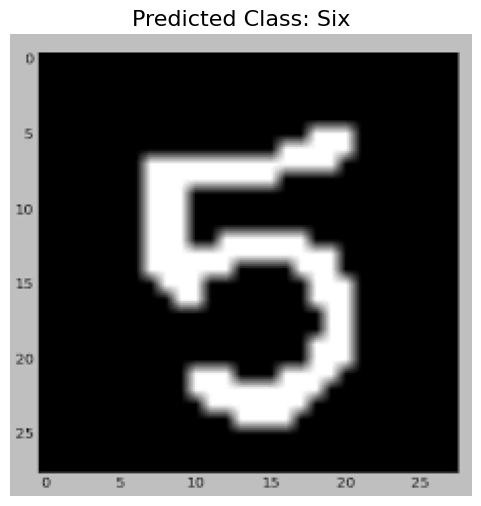

In [18]:
url = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ5wi37gUJD1qpzhA_tNi1BWYvFI0dJvd5WiQhmA0PHr70PJQNKuWt0FdzS8G_XEzZa5J8&usqp=CAU"
prediction(url, labels)

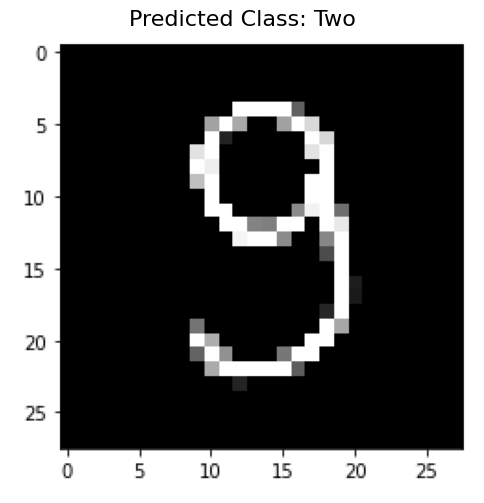

In [36]:
url = "https://i.sstatic.net/vuBw4.png"
prediction(url, labels)